<a href="https://colab.research.google.com/github/otidin/Bayesian_Inference/blob/master/02_PyPharma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Elizaveta Semenova, 2019

# Bayesian Inference with Python: embracing uncertainty.

If anything remains unclear or unanswered after this session, contact:
 - Twitter: @liza_p_semenova

 - Github:  elizavetasemenova

 - E-mail:  elizaveta.p.semenova@gmail.com

In [0]:
!pip install arviz
!pip install pymc3==3.5

     |████████████████████████████████| 1.4MB 8.9MB/s 
     |████████████████████████████████| 4.1MB 49.5MB/s 
     |████████████████████████████████| 317kB 60.1MB/s 
     |████████████████████████████████| 1.3MB 9.5MB/s 
  Found existing installation: pymc3 3.7
    Uninstalling pymc3-3.7:
      Successfully uninstalled pymc3-3.7


## Overview:

- **What** is Bayesian inference?
- **Why** do we care?
- **How** to perform Bayesian inference: a painful way and a modern way
- Examples
- Brainstorm **your** examples

We will use Python for the practical part:

In [0]:
print("All models are wrong, but some are useful.")

All models are wrong, but some are useful.


#### Pre-requisites: 
- familiarity with probability
- familiarity with Python

# WHAT

## What is Bayesian inference?

Bayesian inference is the process of deducing properties of a probability distribution from data using Bayes’ theorem.

Bayes' theorem relies heavily on the notion of **conditional probability**.

## Conditional probability

Conditional probability of A given B:
<br>
<br>
$$P(A \vert B)=\frac{P(A \cap B)}{P(B)}.$$


$P(A \vert B)$ - probability of event A given B has occured<br>
$P(A \cap B)$ - probability of event A occured and B occured

We can derive
<br>
<br>

$$P(A \vert B)= P(B \vert A) \frac{P(A)}{P(B)}$$

The conditional probability of A given B is the
conditional probability of B given A scaled by the relative
probability of A compared to B.

## Bayes' Theorem example 1: diagnosing flue

Find probability of a patient having a flue given they have high temperature. 

A = to have a flue

B = to have high temperture

$$P(\text{flue} \vert \text{temperature})= P(\text{temperature} \vert \text{flue}) \frac{P(\text{flue})}{P(\text{temperature})}$$

We know that the probability of having temperature this time of the year is 10%, probability of having a flue this time of the year is 7%, and among all people having a flue, 70% of them have temperature.

$$ 70\% * 7\% / 10\% = 49\%.$$

## Bayes' Theorem example 2: spam filtering

<div align="center">

![](https://drive.google.com/uc?export=view&id=1CNKtbAyF0yFmx9L8RZ2oRH2_ayOxzEo1)

</div>

We would like to test a message for being a spam, by checking that it
contains a predefined set of words or word combinations, which are
common for spam messages ("Free investment", "Dear email"):
<br>
<br>
<br>
$$P(\text{spam } \vert \text{ words}) =  \frac{ P(\text{words } \vert \text{ spam}) P(\text{spam})}{P(\text{words})}$$



In practice, we usually want to estimate the unknown model parameters 
$$\theta = (\theta_1, ..., \theta_k),$$ given
the observed data $$y = (y_1, ..., y_n)$$
by using the Bayes' rule:
$$P(\theta \vert y) =  \frac{P(y \vert \theta) P(\theta)}{P(y)}.$$

In continuous case, we speak of probability densities $f(.)$.

The **posterior distribution** is being formed as
<br>
<br>
$$f(\theta \vert y) \propto f(y \vert \theta) f(\theta).$$

- $f(\theta)$ is the **prioir** and expresses our beliefs about $\theta$

- $f(y \vert \theta)$ is the **likehod** of data $y$ as a function of $\theta$

- we dropped $f(y)$ because the average likelihood across all parameter values
$$f(y) = \int_{\theta_1} ... \int_{\theta_k} f(\theta) f(y \vert \theta) d\theta_1 ... d\theta_k = E_{\theta}f(y \vert \theta)$$
does not depend on $\theta$  (hence will not influence the inference) and is very hard to compute. 

## Components of the bayesian model
<br>

- Likelihood

- Prior

- Posterior

$$\text{Posterior} = \frac{\text{Likelihood × Prior}}{\text{Average Likelihood}} \propto \text{Likelihood × Prior}$$

# WHY


## Diagnosing the cause of headache
<div align="center">

![](https://drive.google.com/uc?export=view&id=1vfIxNpQaw3xI_4IzaNwFSvFF1YipylUP)

</div>

**Frequentist doctor:**
- A mental model for the cause of pain
- Perform tests<br>

**Bayesian doctor:**
- A mental model for the cause of pain
- History of the patient
- Perform tests

I.e. frequentist inference is like a doctor who never reads patient's history even for patients with chronic conditions.

## Frequetist vs Bayesian approaches
**Frequentist:**
- probability  is a long-run frequency
- parameters are fixed,
- parameters can only be estimated using the current data.

**Bayesian:**
- probability represents one's uncertainty
- parameters are described by distributions (i.e. reflecting uncertainty),
- estimation is based on our belief and/or prior knowledge about parameters and the current data.

Remark: historically, Bayesian approach appeared earlier than the frequentist one. 

Why have we been using frequentist methods all these years?

Because we didn't have computers! Bayesian inference is very hard to make by hand.

## Why use Bayesian inference?
<br>

- Prior knowledge

- Flexible in uncertainty modeling, particularly under small amount of available data

- Very flexible model formulation accounting for the mechanistic knowledge about a system

Note:
- Results are essentially equal with enough data, i.e. the posterior approximates the MLE

## Exercise

- think of a problem relevant to your work where one could benefit from the Bayesian approach

# HOW

<br>

## What does it take?
- Data,
- A generative model,
- Our beliefs before seeing the data.
<br>
<br>

## What does it make?
- The values of parameters that could give rise to the observed data **in the form of a distribution**.

## How

- **analytically**<br>
        
     elegant, but rarely possible.
<br><br>
- **numerically**
<br>

    - Create **posterior** samples, describing the distributions of parameters.
    
    - We achieve this by exploring the space of parameters to find the most probable combinations of parameters. 
    
    - Further we treat the obtained sampled as new data, to extract information about parameters, such as mean, credible interval or other statistics.

## Analytically

<div align="center">

![](https://drive.google.com/uc?export=view&id=12biazm2XfxOAxIqpsDy9jic_bGSlICMb)


</div>

## Numerically

- Markov Chain Monte Carlo (MCMC) family of algorithm, e.g.
  * Metropolis-Hastings
  * Gibbs
  * Hamiltonian Monte Carlo (HMC)
  * No-U-Turn sampler (NUTS)
  * further variants such as SGHMC, LDHMC, etc
- Variational Bayes
- Approximate Bayesian Computation (ABC)
- Particle filters
- Laplace approximation

## Priors

<br>

- Informative / Non-informative

- **conjugate priors** guarantee that the posterior has an easily calculable form

## Colab introduction

## Python refresher

## Numertical Python (NumPy)

In [0]:
import numpy as np

Create a list

In [0]:
lst = [1, 2, 3]
type(lst)

list

Convert the list into a numpy array

In [0]:
m = np.array(lst)
type(m)

numpy.ndarray

Multidimensional arrays

In [0]:
m = np.array([[1, 2, 3], [4, 5, 6]])
m

array([[1, 2, 3],
       [4, 5, 6]])

Find dimensions (rows, columns)

In [0]:
m.shape

(2, 3)

Evenly spaced values in a ginven interval

In [0]:
m = np.arange(0, 24, 2)
m

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22])

In [0]:
m1 = m.reshape(4, 3) # reshape array to be 3x5
m1

array([[ 0,  2,  4],
       [ 6,  8, 10],
       [12, 14, 16],
       [18, 20, 22]])

In [0]:
m

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22])

In [0]:
m.resize(2, 6)
m

array([[ 0,  2,  4,  6,  8, 10],
       [12, 14, 16, 18, 20, 22]])

In [0]:
m = np.linspace(0, 2, 9)
m

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  ])

## Scipy

In [0]:
import scipy.stats as stats

The general pattern to access functions related to probability distributions is

 $$ \text{scipy.stats.<distribution family>.<function>}$$

In [0]:
stats.beta.cdf(0.1, 2, 3) # evaluates the CDF of a beta(2, 3) random variable at 0.1.

0.05230000000000001

generate 10 random sample from a normal (Gaussian) random variable with mean 2 and standard deviation 3

In [0]:
stats.norm.rvs(2, 3, size=10) 

array([ 5.63684726, -1.82044847, -4.991926  ,  0.18960293,  5.20872599,
        0.48191567, -0.03261598,  3.64708672, -0.49583145,  1.26444473])

## Examples

In [0]:
import arviz

In [0]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
import pymc3 as pm
import pystan
#import tensorflow as tf
plt.style.use('seaborn-darkgrid')

In [0]:
pm.__version__ # if not 3.5, run `%pip install pymc3==3.5`

'3.5'

In [0]:
##############################################
# prioir x likelihood = posterior
##############################################

success=6

tosses=9

In [0]:
# define grid
grid_points=100

# define grid
p_grid = np.linspace(0, 1, grid_points)

# compute likelihood at each point in the grid
likelihood = stats.binom.pmf(success, tosses, p_grid)

In [0]:
prior = np.repeat(1, grid_points)  

# compute product of likelihood and prior
unstd_posterior = likelihood * prior

In [0]:
def computePosterior(likelihood, prior):
    
    # compute product of likelihood and prior
    unstd_posterior = likelihood * prior

    # standardize posterior
    posterior = unstd_posterior / unstd_posterior.sum()
    
    plt.figure(figsize=(17, 3))
    ax1 = plt.subplot(131)
    ax1.set_title("Prior")
    plt.plot(p_grid, prior)

    ax2 = plt.subplot(132)
    ax2.set_title("Likelihood")
    plt.plot(p_grid, likelihood)

    ax3 = plt.subplot(133)
    ax3.set_title("Posterior")
    plt.plot(p_grid, posterior)
    plt.show()
    
    return posterior
    

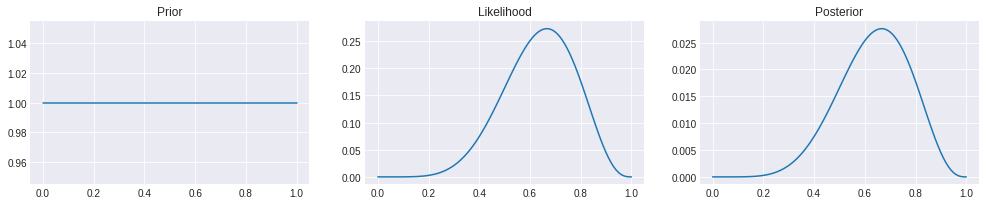

In [0]:
prior1 = np.repeat(1, grid_points)  
posterior1 = computePosterior(likelihood, prior1)

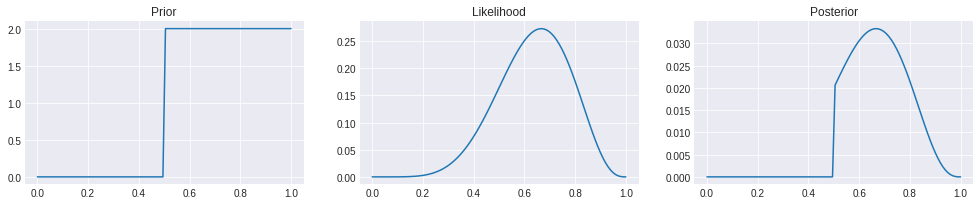

In [0]:
prior2 = 2* (p_grid >= 0.5).astype(int)
posterior2 = computePosterior(likelihood, prior2)

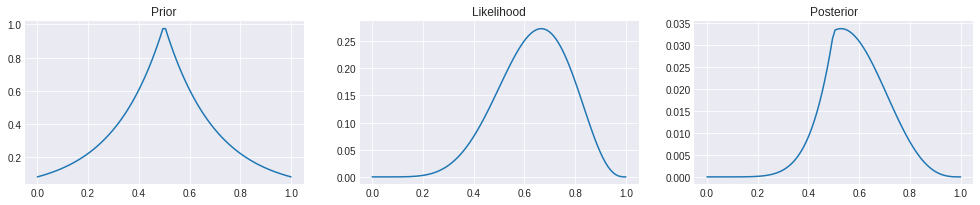

In [0]:
prior3 = np.exp(- 5 * abs(p_grid - 0.5)) 
posterior3 = computePosterior(likelihood, prior3)

In [0]:
sum(posterior1[(p_grid > 0.48) * (p_grid < 0.52)])

0.06628770440914389

In [0]:
sum(posterior2[(p_grid > 0.48) * (p_grid < 0.52)])

0.04244163076286271

In [0]:
sum(posterior3[(p_grid > 0.48) * (p_grid < 0.52)])

0.12623979149806275

## The Monte Carlo method

Find approximate value of $\pi.$

In [0]:
def in_circle(x, y, r):
    return math.sqrt(x **2 + y**2) <= r**2

In [0]:
def approx_pi(r, n):
    
    xs, ys, cols = [], [], []
    
    count = 0
    
    for i in range(n):
        x = np.random.uniform(0,r,1)
        y = np.random.uniform(0,r,1)
        xs.append(x)
        ys.append(y)

        if in_circle(x, y, r):
            count += 1
            cols.append("red")
        else:
            cols.append("steelblue")
            
    pi_appr = round(4 * count/n, 3)
    
    plt.figure(figsize=(2, 2))
    plt.scatter(xs, ys, c = cols, s=2)
    plt.title("pi (approximately) = " + str(pi_appr))
    plt.xticks([])
    plt.yticks([])
    plt.show()
    
    return pi_appr

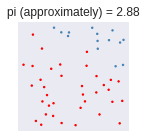

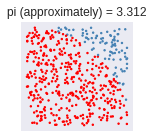

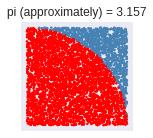

In [0]:
r = 1

for n in 5*10**np.array([1,2,3]):
    approx_pi(r, n)

## Monte Carlo integration

Find value of the integral

$$\int_b^b f(x)dx. $$

Monte Carlo integration estimates this integral by estimaing the fraction of random points that fall below $f(x)$.

In our context, we are interested in estimating expectations

$$ E[h(x)] = \int h(x)f(x)dx,$$

which can be done with 

$$ \bar{h}_n = \frac{1}{n} \sum_i^n h(x_i),$$
where $x_i ∼ f$ is a draw from the density $f$.

The convergence of Monte Carlo integration is $0(n^{1/2})$ and independent of the dimensionality. Hence Monte Carlo integration gnereally beats numerical intergration for moderate- and high-dimensional integration since numerical integration (quadrature) converges as $0(n^d)$.

### Example

Estiamte the integral $\int_0^1 e^x dx$. 

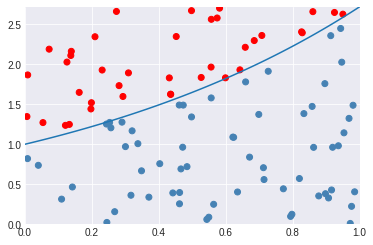

In [0]:
x = np.linspace(0, 1, 100)
plt.plot(x, np.exp(x));
pts = np.random.uniform(0,1,(100, 2))
pts[:, 1] *= np.e

cols = ['steelblue'] * 100
for i in range(100):
    if pts[i,1] > np.exp(pts[i,0]):     # acceptance / rejection step
        cols[i] = 'red'
    
plt.scatter(pts[:, 0], pts[:, 1], c = cols)
plt.xlim([0,1])
plt.ylim([0, np.e]);

In [0]:
# analytic solution

from sympy import symbols, integrate, exp
x = symbols('x')
expr = integrate(exp(x), (x,0,1))
expr.evalf()

1.71828182845905

In [0]:
# numerical quadrature

from scipy import integrate
integrate.quad(exp, 0, 1)

(1.7182818284590453, 1.9076760487502457e-14)

In [0]:
# Monte Carlo approximation

for n in 10**np.array([1,2,3,4,5,6,7,8]):
    pts = np.random.uniform(0, 1, (n, 2))
    pts[:, 1] *= np.e
    count = np.sum(pts[:, 1] < np.exp(pts[:, 0]))
    volume = np.e * 1 # volume of region
    sol = (volume * count)/n    
    print('%10d %.6f' % (n, sol))

        10 1.630969
       100 1.658152
      1000 1.777756
     10000 1.717139
    100000 1.724424
   1000000 1.715959
  10000000 1.718249
 100000000 1.718397


## Mandatory coin tossing example

Is the coin biased if we observed (H, H, T, H, ... ,  T, H)?

### The frequentist way - analytically

How to derive the MLE estimate?


$$L (\theta) = \theta^\text{heads} (1-\theta)^\text{tails}  $$


$$\log L (\theta) = \text{heads} * \log \theta +  \text{tails} * \log (1-\theta)  $$

$$ \frac{d \log L}{ \ d \theta} = \frac{\text{heads}}{\theta} + \frac{\text{tails}}{1-\theta} = 0 $$

and so 

$$ \hat{\theta} = \frac{\text{heads}}{\text{heads + tails}} $$

### The frequentist way - numerically

In [0]:
n = 4
h = 3
p = h/n
#rv = stats.binom(n, p)
#mu = rv.mean()
#mu
p

0.75

### The Bayesian way

Beta distribution:

$$ \text{Beta}_\theta(a,b)  = C * \theta^{(a-1)} (1 - \theta)^{(b-1)} $$

### Exercise

compute posterior distribution analytically

In [0]:
a, b = 10, 10                   # hyperparameters
prior = stats.beta(a, b)        # prior
post = stats.beta(h+a, n-h+b)   # posterior

In [0]:

def beta_binomial(n, h, a, b):
    # frequentist
    p = h/n
    rv = stats.binom(n, p)
    mu = rv.mean()
    
    # Bayesian
    prior = stats.beta(a, b)
    post = stats.beta(h+a, n-h+b)
    
    thetas = np.linspace(0, 1, 200)
    plt.figure(figsize=(8, 6))
    plt.plot(thetas, prior.pdf(thetas), label='Prior', c='blue')
    plt.plot(thetas, post.pdf(thetas), label='Posterior', c='red')
    plt.plot(thetas, n*stats.binom(n, thetas).pmf(h), label='Likelihood', c='green')
    plt.axvline((h+a-1)/(n+a+b-2), c='red', linestyle='dashed', alpha=0.4, label='MAP')
    plt.axvline(mu/n, c='green', linestyle='dashed', alpha=0.4, label='MLE')
    plt.xlim([0, 1])
    plt.xlabel(r'$\theta$', fontsize=14)
    plt.ylabel('Density', fontsize=16)
    plt.legend();

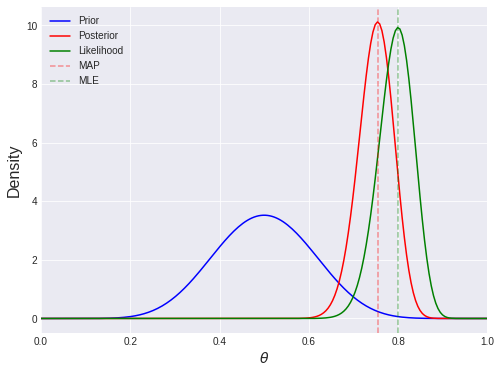

In [0]:
beta_binomial(100, 80, 10, 10)

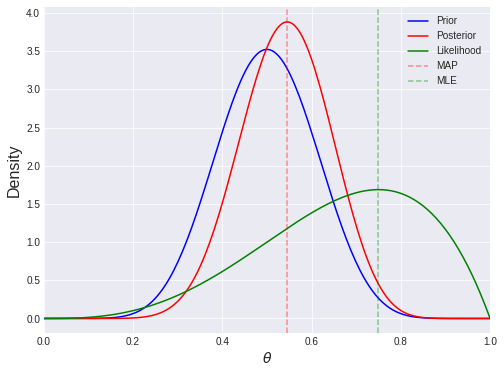

In [0]:
beta_binomial(4, 3, 10, 10)

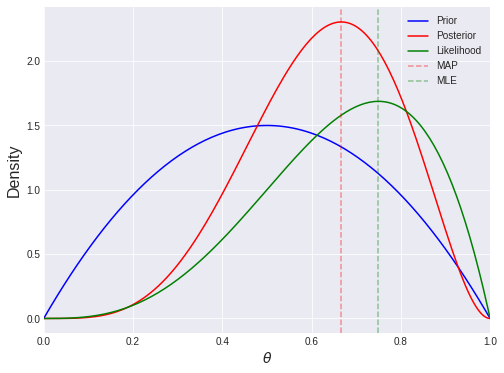

In [0]:
beta_binomial(4, 3, 2, 2)

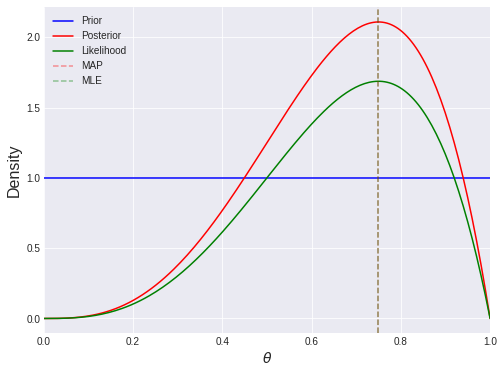

In [0]:
beta_binomial(4, 3, 1, 1)

## Markov Chain Monte Carlo

 - We want to estiamte the posterior distribution, but this is often intractable due to the high-dimensional integral in the denominator (marginal likelihood)

Markov Chain Monte Carlo idea: 

- draw samples from a (simple) proposal distribution so that each draw depends only on the state of the previous draw (i.e. the samples form a Markov chain)
- under certain conditions, the Markov chain will have a unique stationary distribution

- we set up an acceptance criteria for each draw based on comparing successive states with respect to a target distribution that enusre that the stationary distribution is the posterior distribution we are searching for

- there is no need to evaluate the potentially intractable marginal likelihood

- after sufficient number of iterations, the Markov chain of accepted draws will converge to the staionary distribution, and we can use those samples as (correlated) draws from the posterior distribution, and find functions of the posterior distribution in the same way as for vanilla Monte Carlo integration.


## Metropolis-Hastings random walk algorithm

- Start with an initial guess for $\theta$
- Chose a new proposed value as $\theta_p = \theta + \delta \theta, \delta \theta \sim N(0, \sigma).$ 
Here we have chosen the proposal distribution to be $N(0, \sigma).$
- If $g$ is the posterior probability, calculate the ratio $\rho = \frac{g(\theta_p \mid X)}{g(\theta \mid X)}$
- (adjust for symmetry of the proposal distribution)
- If $\rho \ge 1,$ accept $\theta = \theta_p;$ if $\rho < 1,$ accept  $\theta = \theta_p$ with probability $p,$ other wise keep $\theta = \theta.$ (This step is done with the help of the standard Uniform distribution)

In [0]:
def target(likelihood, prior, n, h, theta):
    if theta < 0 or theta > 1:
        return 0
    else:
        return likelihood(n, theta).pmf(h)*prior.pdf(theta)

In [0]:
n = 100
h = 61
a = 10
b = 10
likelihood = stats.binom
prior = stats.beta(a, b)
sigma = 0.3

In [0]:
naccept = 0
theta = 0.1
niters = 10000

samples = np.zeros(niters+1)
samples[0] = theta

for i in range(niters):
    theta_p = theta + stats.norm(0, sigma).rvs()
    rho = min(1, target(likelihood, prior, n, h, theta_p)/target(likelihood, prior, n, h, theta ))
    u = np.random.uniform()
    if u < rho:
        naccept += 1
        theta = theta_p
    samples[i+1] = theta

In [0]:
nmcmc = len(samples)//2
print("Portion of accepted steps = " + str(naccept/niters))

Portion of accepted steps = 0.1904


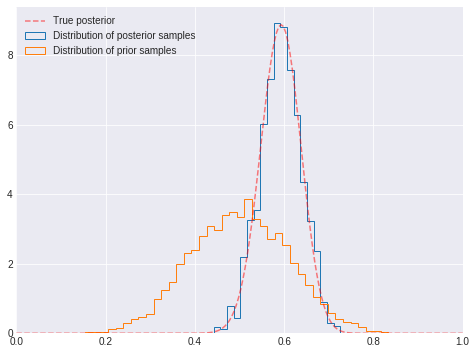

In [0]:
post = stats.beta(h+a, n-h+b)
thetas = np.linspace(0, 1, 200)

plt.figure(figsize=(8, 6))
plt.hist(samples[nmcmc:], 20, histtype='step', density=True, linewidth=1, label='Distribution of posterior samples');
plt.hist(prior.rvs(nmcmc), 40, histtype='step', density=True, linewidth=1, label='Distribution of prior samples');
plt.plot(thetas, post.pdf(thetas), c='red', linestyle='--', alpha=0.5, label='True posterior')
plt.xlim([0,1]);
plt.legend(loc='best');

In [0]:
h

In [0]:
?plt.hist

We run the chain for $N$ iterations and discard the first $B$ samples. This is called **burn-in**.

We can run several parallel versions of the algorithm. Each of them is called a **chain.**

Neigbouring samples will contain similar information. We might want to save only every second, or fifth, or tenth. This is called **thinnning.**

## Convergence diagnostics

Rigorous way of assesing convergence is an unsolved problems. But there are several tool swe can use to convice ourselves that an MCMC has converged, such as

- trace plots need to look stationary
- parallel chain should carry similar information



In [0]:
def mh_coin(niters, n, h, theta, likelihood, prior, sigma):
    samples = [theta]
    while len(samples) < niters:
        theta_p = theta + stats.norm(0, sigma).rvs()
        rho = min(1, target(likelihood, prior, n, h, theta_p)/target(likelihood, prior, n, h, theta ))
        u = np.random.uniform()
        if u < rho:
            theta = theta_p
        samples.append(theta)
        
    return samples

In [0]:
n = 100
h = 61
lik = stats.binom
prior = stats.beta(a, b)
sigma = 0.05
niters = 100

In [0]:
chains = [mh_coin(niters, n, h, theta, likelihood, prior, sigma) for theta in np.arange(0.1, 1, 0.2)]

Compare multiple chains

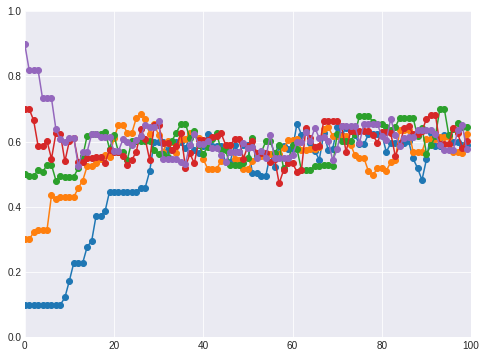

In [0]:
plt.figure(figsize=(8, 6))

for chain in chains:
    plt.plot(chain, '-o')
    
plt.xlim([0, niters])
plt.ylim([0, 1]);

Was this painful to write a sampler by hand? 

If not, bare in mind that we only wrote the simplest one possible! Sampling algorithms can get very complicated.

Luckily, we do not need to write a sampler by hand every time, because probabilistic programming languages (PPLs) are there to help.

A PPL allows to formalize a Bayesian model and perform inference with the help of powerful algorithms. A user needs to only formulate the model (and maybe chose a sampler) and press the inference button. 

The list of currently existing PPLs is overwhelmingly long and only keeps growing: 

- BUGS, WinBUGS, JAGS, 
- Stan, 
- PyMC3, PyMC4, 
- Nimble, 
- Pyro, 
- Edward, TensorFlow Probability, Edward 2,
- Gen, 
- Turing, 
- Stheno, 
- SOSS, 
- Omega, 
- Infer.NET 

to name a few.

## Probabilistic programming languages (PPLs)

PPLs accessible via or native to Python include

Python-native:
- **PyMC3**
- PyMC4
- PyRo
- **Edward2**

API for Stan in Python:
- **PyStan**


We will consider PPLs available via Python in breadth and depth: first, we will implement the same simple model in several PPLs (breadth), and then will dive into one PPLs by considering more examples.

## PyMC3

https://docs.pymc.io/


## PyMC3 syntaxis

Model creation

In [0]:
with pm.Model() as model:
    # Model definition
    pass

Unobserved random variables

In [0]:
with pm.Model():
    x = pm.Normal('x', mu=0, sd=1)

Observed random variables

In [0]:
with pm.Model() as model:
    obs = pm.Normal('obs', mu=3, sd=1, observed=np.random.randn(100))

## Coin tossing problem - PyMC3

In [0]:
n = 100    # number of trials
h = 61     # number of successes
#alpha = 2  # hyperparameters
#beta = 2

niter = 1000

In [0]:
%%time
with pm.Model() as model: 
    # prior
    p = pm.Beta('p', alpha=2, beta=2)

    # likelihood
    y = pm.Binomial('y', n=n, p=p, observed=h)

    # inference
    start = pm.find_MAP()  # Use MAP estimate (optimization) as the initial state for MCMC
    step = pm.Metropolis() # Have a choice of samplers
    
    trace = pm.sample(niter, step, start, random_seed=123, progressbar=True)
    
    #trace = pm.sample(niter, random_seed=123, progressbar=True)

logp = -4.5407, ||grad|| = 11: 100%|██████████| 6/6 [00:00<00:00, 505.12it/s]
Sequential sampling (2 chains in 1 job)
INFO:pymc3:Sequential sampling (2 chains in 1 job)
Metropolis: [p]
INFO:pymc3:Metropolis: [p]
100%|██████████| 1500/1500 [00:00<00:00, 6419.61it/s]
The number of effective samples is smaller than 25% for some parameters.
INFO:pymc3:The number of effective samples is smaller than 25% for some parameters.


CPU times: user 2.05 s, sys: 128 ms, total: 2.18 s
Wall time: 6.42 s


In [0]:
%%time
with pm.Model() as model: 
    # prior
    p = pm.Beta('p', alpha=2, beta=2)

    # likelihood
    y = pm.Binomial('y', n=n, p=p, observed=h)

    # inference
    # start = pm.find_MAP()  # Use MAP estimate (optimization) as the initial state for MCMC
    # step = pm.Metropolis() # Have a choice of samplers
    
    #trace = pm.sample(niter, step, start, random_seed=123, progressbar=True)
    
    trace = pm.sample(niter, random_seed=123, progressbar=True)

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
INFO:pymc3:Sequential sampling (2 chains in 1 job)
NUTS: [p]
INFO:pymc3:NUTS: [p]
100%|██████████| 1500/1500 [00:00<00:00, 1975.00it/s]


CPU times: user 2.85 s, sys: 24.1 ms, total: 2.87 s
Wall time: 2.89 s


In [0]:
%%time
# a hierarchical model
with pm.Model() as model: 

    alpha_hyp =  pm.Binomial('alpha_hyp', n = 10, p=0.5 ) 
    beta_hyp =  pm.Binomial('beta_hyp', n = 10, p=0.5 ) 

    # prior
    p = pm.Beta('p', alpha=alpha_hyp, beta=beta_hyp)

    # likelihood
    y = pm.Binomial('y', n=n, p=p, observed=h)

    trace = pm.sample(niter, random_seed=123, progressbar=True)

Sequential sampling (2 chains in 1 job)
INFO:pymc3:Sequential sampling (2 chains in 1 job)
CompoundStep
INFO:pymc3:CompoundStep
>CompoundStep
INFO:pymc3:>CompoundStep
>>Metropolis: [beta_hyp]
INFO:pymc3:>>Metropolis: [beta_hyp]
>>Metropolis: [alpha_hyp]
INFO:pymc3:>>Metropolis: [alpha_hyp]
>NUTS: [p]
INFO:pymc3:>NUTS: [p]
100%|██████████| 1500/1500 [00:01<00:00, 1032.80it/s]
The number of effective samples is smaller than 25% for some parameters.
INFO:pymc3:The number of effective samples is smaller than 25% for some parameters.


CPU times: user 6.35 s, sys: 488 ms, total: 6.84 s
Wall time: 30 s


In [0]:
%%time
with pm.Model() as model: 

    alpha_hyp =  pm.Binomial('alpha_hyp', n = 10, p=0.5 ) 
    beta_hyp =  pm.Binomial('beta_hyp', n = 10, p=0.5 ) 

    # prior
    p = pm.Beta('p', alpha=alpha_hyp, beta=beta_hyp)

    # likelihood
    y = pm.Binomial('y', n=n, p=p, observed=h)

CPU times: user 604 ms, sys: 5.68 ms, total: 609 ms
Wall time: 613 ms


In [0]:
with model:
  trace = pm.sample(niter, random_seed=123, progressbar=True)


Sequential sampling (2 chains in 1 job)
INFO:pymc3:Sequential sampling (2 chains in 1 job)
CompoundStep
INFO:pymc3:CompoundStep
>CompoundStep
INFO:pymc3:>CompoundStep
>>Metropolis: [beta_hyp]
INFO:pymc3:>>Metropolis: [beta_hyp]
>>Metropolis: [alpha_hyp]
INFO:pymc3:>>Metropolis: [alpha_hyp]
>NUTS: [p]
INFO:pymc3:>NUTS: [p]
100%|██████████| 1500/1500 [00:01<00:00, 1047.98it/s]
The number of effective samples is smaller than 25% for some parameters.
INFO:pymc3:The number of effective samples is smaller than 25% for some parameters.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


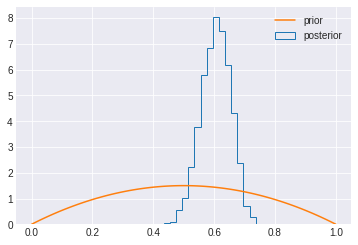

In [0]:
alpha = 2  
beta = 2
plt.hist(trace['p'], 15, histtype='step', normed=True, label='posterior');
x = np.linspace(0, 1, 100)
plt.plot(x, stats.beta.pdf(x, alpha, beta), label='prior');
plt.legend(loc='best');

Convergence diagnostics

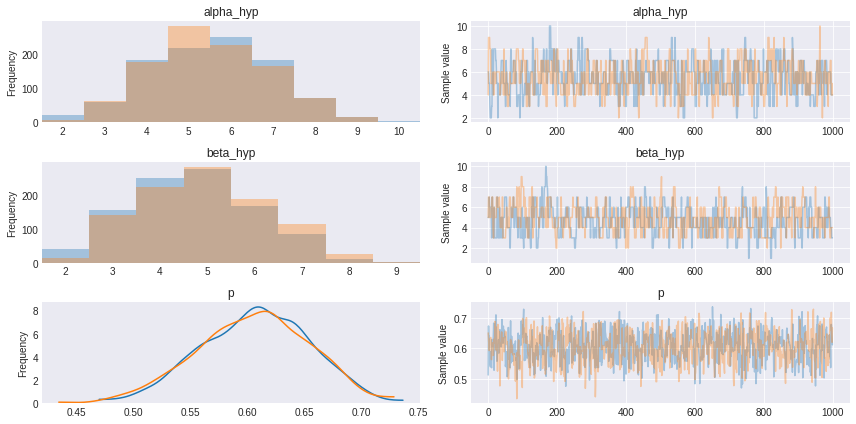

In [0]:
# traceplot
pm.traceplot(trace)
pass

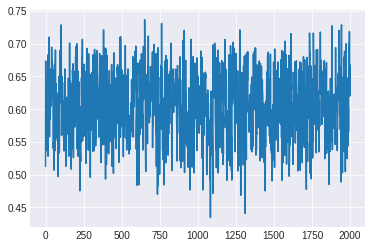

In [0]:
# extract values
p_samps_pymc = trace.get_values('p', chains = [0,1])
fig, ax = plt.subplots()
ax.plot(p_samps_pymc)
pass

In [0]:
# summary
pm.summary(trace).round(2)

/usr/local/lib/python3.6/dist-packages/pymc3/stats.py:974: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  axis=1, join_axes=[dforg.index])


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
p,0.61,0.05,0.0,0.51,0.69,812.85,1.0


In [0]:
# diagnostics: Gelman-Rubin
print(pm.diagnostics.gelman_rubin(trace))

{'p': 1.000822778227915}


In [0]:
# diagnostics: n effective
print(pm.diagnostics.effective_n(trace))

{'p': 812.846834652879}


/usr/local/lib/python3.6/dist-packages/pymc3/plots/forestplot.py:318: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  ticks.tick1On = False
/usr/local/lib/python3.6/dist-packages/pymc3/plots/forestplot.py:319: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  ticks.tick2On = False


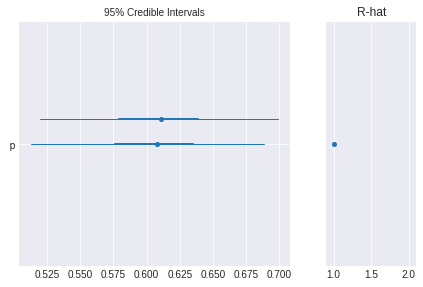

In [0]:
pm.forestplot(trace);

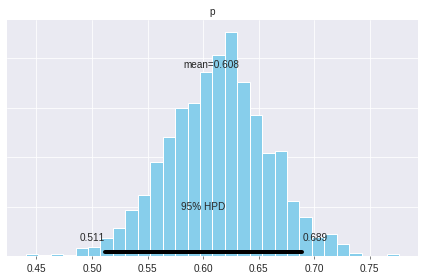

In [0]:
pm.plot_posterior(trace);

PyMC3, offers a variety of other samplers, found in pm.step_methods.

In [0]:
list(filter(lambda x: x[0].isupper(), dir(pm.step_methods)))

['BinaryGibbsMetropolis',
 'BinaryMetropolis',
 'CSG',
 'CategoricalGibbsMetropolis',
 'CauchyProposal',
 'CompoundStep',
 'DEMetropolis',
 'ElemwiseCategorical',
 'EllipticalSlice',
 'HamiltonianMC',
 'LaplaceProposal',
 'Metropolis',
 'MultivariateNormalProposal',
 'NUTS',
 'NormalProposal',
 'PoissonProposal',
 'SGFS',
 'SMC',
 'Slice']

## Exercise

Modify the PyMC3 code above to allow the hyperparameters alpha and beta to be given by user.

## PyStan

Unlike PyMC3, PyStan is not Python native. Stan is written in C++, and PyStan provides an interface for it.

### Model formulation

Components of a PyStan model are

- (optional) functions
- data
- (optional) transformed data
- parameters
- (optional) transformed paraeters
- model
- (optional) generated qunatities

In [0]:
stan_code = """
data {
    int<lower=0> n; // number of tosses
    int<lower=0> h; // number of heads
    
}
transformed data {}
parameters {
    real<lower=0, upper=1> p;
}
transformed parameters {}
model {
    p ~ beta(2, 2);
    h ~ binomial(n, p);
}
generated quantities {}
"""

### Data

In [0]:
stan_data = {
             'n': 100,
             'h': 61,
            }

In [0]:
fit = pystan.stan(model_code=stan_code, data=stan_data, iter=1000, chains=1)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_540b01d30c5a6d770ae2a42b41ae03e9 NOW.


We could also have loaded the Stan model from file:

$$ \text{fit = pystan.stan(file='coin_code.stan', data=coin_dat, iter=1000, chains=1)} $$

### Convergence diagnostics

In [0]:
print(fit)

Inference for Stan model: anon_model_540b01d30c5a6d770ae2a42b41ae03e9.
1 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=500.

       mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
p       0.6  3.2e-3   0.05   0.51   0.57   0.61   0.64    0.7    218    1.0
lp__ -70.23    0.04   0.71 -72.21  -70.4 -69.98  -69.8 -69.74    275    1.0

Samples were drawn using NUTS at Thu Nov 21 15:26:49 2019.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [0]:
coin_dict = fit.extract()
coin_dict.keys()
# lp_ is the log posterior

odict_keys(['p', 'lp__'])

In [0]:
[u'mu', u'sigma', u'lp__']

['mu', 'sigma', 'lp__']

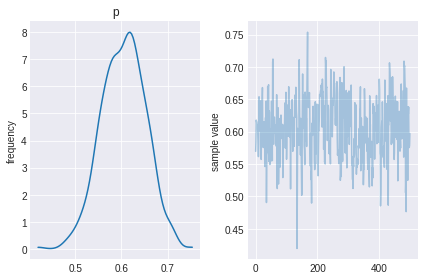

In [0]:
fit.plot('p');
plt.tight_layout()

## Optimazation (computing MAP)

In [0]:
m = pystan.StanModel(model_code=stan_code)
p_map = m.optimizing(data=stan_data)
p_map

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_540b01d30c5a6d770ae2a42b41ae03e9 NOW.


OrderedDict([('p', array(0.60784232))])

# EXAMPLES

## Estimating parameters of the normal distribution


$$y ∼ N(\mu, \sigma^2)$$

### Data generation

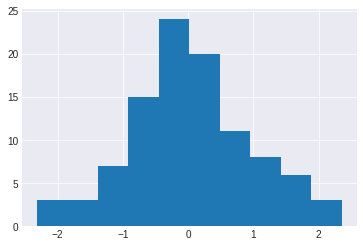

In [0]:
N = 100
niter = 20000
x = np.random.normal(0,1,N)
plt.hist(x)
pass

### PyMC3 Model

In [0]:
# assume known variance, unknown mean

%%time
with pm.Model() as model1:
    # prior
    mean = pm.Normal('mu', mu=0, sd=0.5)
    # likelihood
    obs = pm.Normal('obs', mu=mean, sd=1, observed = x)
    trace = pm.sample(niter, nobjs = 4)

NameError: ignored

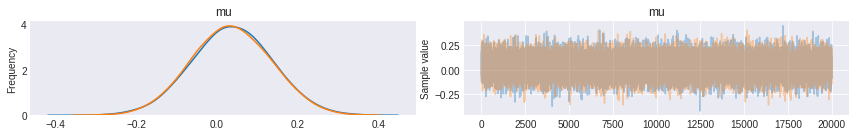

In [0]:
# traceplot
pm.traceplot(trace)
pass

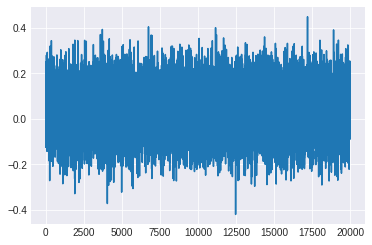

In [0]:
# extract values
mu_samps_pymc = trace.get_values('mu', chains = [0])
fig, ax = plt.subplots()
ax.plot(mu_samps_pymc)
pass

In [0]:
# summary
pm.summary(trace).round(2)

/usr/local/lib/python3.6/dist-packages/pymc3/stats.py:974: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  axis=1, join_axes=[dforg.index])


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
mu,0.03,0.1,0.0,-0.15,0.23,16523.67,1.0


In [0]:
# diagnostics: Gelman-Rubin
print(pm.diagnostics.gelman_rubin(trace))

{'mu': 1.0000879977510448}


In [0]:
# diagnostics: n effective
print(pm.diagnostics.effective_n(trace))

{'mu': 16523.66928221451}


### PyStan Model

In [0]:
stan_code = """
data{
 int<lower=0> N;
 real obs[N];
}

parameters{
 real mu;
}

model{
 mu ~ normal(0, 0.5);
 obs ~ normal(mu, 1);
}
"""

In [0]:
%%time
# compile the model - it takes some time
m = pystan.StanModel(model_code = stan_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_3a98e39d5957ad591d896241baa5cd63 NOW.


CPU times: user 1.22 s, sys: 72.1 ms, total: 1.29 s
Wall time: 1min 12s


Avoid recompilation:

In [0]:
import pickle
from pystan import StanModel

# save it to the file 'model.pkl' for later use
with open('model.pkl', 'wb') as f:
    pickle.dump(m, f)

In [0]:
# load it somewhere later in the code
m = pickle.load(open('model.pkl', 'rb'))

In [0]:
stan_dat = {'N': N, 'obs': x} 
fit = m.sampling(data=stan_dat, iter=niter, chains=2)

In [0]:
print(fit)

Inference for Stan model: anon_model_3a98e39d5957ad591d896241baa5cd63.
2 chains, each with iter=20000; warmup=10000; thin=1; 
post-warmup draws per chain=10000, total post-warmup draws=20000.

       mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu     0.03  1.2e-3    0.1  -0.15  -0.03   0.03    0.1   0.23   6627    1.0
lp__ -44.54  7.1e-3   0.69 -46.54 -44.69 -44.28 -44.11 -44.06   9462    1.0

Samples were drawn using NUTS at Sat Nov 16 22:21:20 2019.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


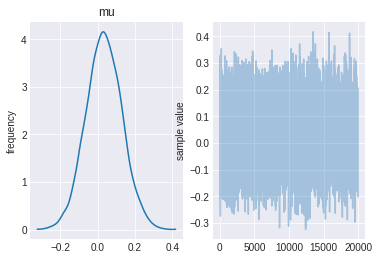

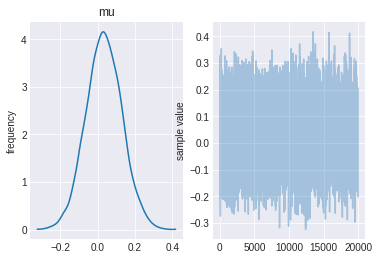

In [0]:
fit.plot()

## Linear regression

Likelihood:

$$ y \sim N(ax+b, \sigma^2)$$

Priors:

$$ a \sim N(0,100) $$
$$ b \sim N(0,100) $$
$$ \sigma \sim U(0,20) $$


### Data generation

In [0]:
n = 11
a_true = 6
b_true = 2
x = np.linspace(0, 1, n)
y = a_true*x + b_true + np.random.randn(n)

stan_data = {
             'n': n,
             'x': x,
             'y': y
            }

### PyStan Model

In [0]:
stan_model = """
data {
    int<lower=0> n;
    real x[n];
    real y[n];
}
transformed data {}
parameters {
    real a;
    real b;
    real sigma;
}
transformed parameters {
    real mu[n];
    for (i in 1:n) {
        mu[i] <- a*x[i] + b;
        }
}
model {
    sigma ~ uniform(0, 20);
    y ~ normal(mu, sigma);
}
generated quantities {}
"""

### Fit

In [0]:
fit = pystan.stan(model_code=stan_model, data=stan_data, iter=1000, chains=1)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_031da8fd1c3e0701af9e6a48bc00e125 NOW.


In [0]:
print(fit)

Inference for Stan model: anon_model_031da8fd1c3e0701af9e6a48bc00e125.
1 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=500.

         mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
a        5.29    0.07    0.8    3.6    4.8   5.32   5.83   6.83    129    1.0
b        2.44    0.04   0.47   1.56   2.07   2.43   2.75   3.31    112    1.0
sigma    0.87    0.04   0.32    0.5   0.66    0.8   0.98   1.86     72    1.0
mu[1]    2.44    0.04   0.47   1.56   2.07   2.43   2.75   3.31    112    1.0
mu[2]    2.96    0.04    0.4   2.22   2.66   2.95   3.24   3.71    122    1.0
mu[3]    3.49    0.03   0.35   2.85   3.25   3.48   3.72   4.11    147    1.0
mu[4]    4.02    0.02    0.3   3.43   3.82   4.02   4.23   4.59    212    1.0
mu[5]    4.55    0.01   0.28   3.97   4.37   4.55   4.73    5.1    408    1.0
mu[6]    5.08    0.01   0.27   4.46   4.91   5.08   5.26   5.64    546    1.0
mu[7]    5.61    0.01   0.29    5.

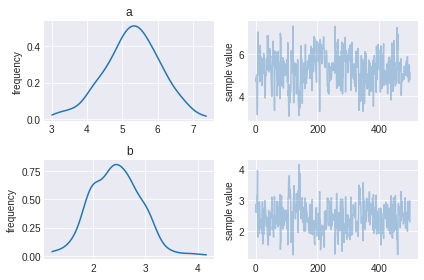

In [0]:
fit.plot(['a', 'b']);
plt.tight_layout()

### Exercise

Convert this PyStan code into PyMC3.

## Binomial likelihood

In [0]:
n = 5 * np.ones(4)
x = np.array([-0.896, -0.296, -0.053, 0.727])
y = np.array([0, 1, 3, 5])

In [0]:
import theano.tensor as t

def invlogit(x):
    return t.exp(x) / (1 + t.exp(x))

### PyMC3 model

In [0]:
with pm.Model() as model:
    # define priors
    alpha = pm.Normal('alpha', mu=0, sd=5)
    beta = pm.Flat('beta')

    # define likelihood
    p = invlogit(alpha + beta*x)
    y_obs = pm.Binomial('y_obs', n=n, p=p, observed=y)

    # inference
    start = pm.find_MAP()
    step = pm.NUTS()
    trace = pm.sample(niter, step, start, random_seed=123, progressbar=True)

logp = -4.5185, ||grad|| = 0.00069022: 100%|██████████| 13/13 [00:00<00:00, 1186.92it/s]  
Sequential sampling (2 chains in 1 job)
INFO:pymc3:Sequential sampling (2 chains in 1 job)
NUTS: [beta, alpha]
INFO:pymc3:NUTS: [beta, alpha]
100%|██████████| 1500/1500 [00:01<00:00, 931.27it/s]
The number of effective samples is smaller than 25% for some parameters.
INFO:pymc3:The number of effective samples is smaller than 25% for some parameters.


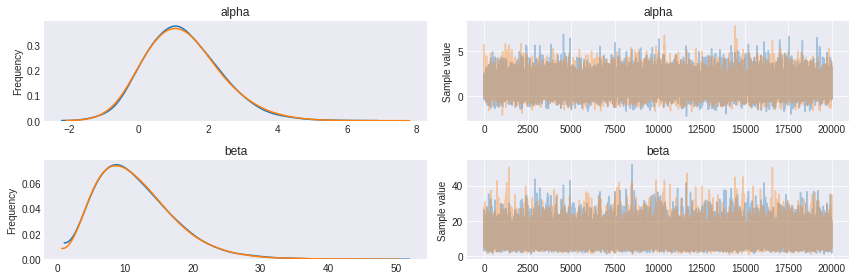

In [0]:
# traceplot
pm.traceplot(trace)
pass

### Exercise

Convert this PyMC3 code into PyStan.

## Mixture model

In [0]:
from random import choices

In [0]:
p = 0.5
population = [1, 2]
weights = [p, 1-p]

In [0]:
?choices

In [0]:
nx = 20
cluster = choices(population, weights, k=nx)
cluster

[2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2]

In [0]:
mu = [-0.3, 0.5]
sd = [0.3, 0.1]

In [0]:
nx = 1000
cluster = choices(population, weights, k=nx)
x = [stats.norm.rvs(mu[c-1], sd[c-1]) for c in cluster]

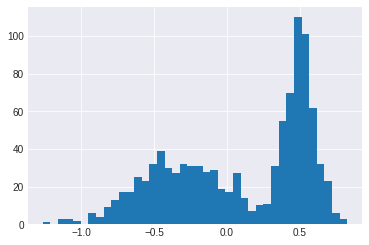

In [0]:
plt.hist(x, bins=40);

In [0]:
# setup model
with pm.Model() as model:
  
  # cluster sizes
  p = pm.Dirichlet('p', a=np.array([1., 1.]), shape=2)

  category = pm.Categorical('category',
                              p=p,
                              shape=nx)

  means = pm.Normal('means', mu=[0, 0], sd=2, shape=2)

  sds = pm.TruncatedNormal('sds', mu=[0.1, 0.1], sd=2, shape=2)

  points = pm.Normal('obs',
                       mu=means[category],
                       sd=sds[category],
                       observed=x)

In [0]:
with model:
    step1 = pm.Metropolis(vars=[means, sds, p])
    step2 = pm.ElemwiseCategorical(vars=[category], values=[0, 1])
    tr = pm.sample(10000, step=[step1, step2], tune=5000)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: ElemwiseCategorical is deprecated, switch to CategoricalGibbsMetropolis.
  This is separate from the ipykernel package so we can avoid doing imports until
Sequential sampling (2 chains in 1 job)
INFO:pymc3:Sequential sampling (2 chains in 1 job)
CompoundStep
INFO:pymc3:CompoundStep
>CompoundStep
INFO:pymc3:>CompoundStep
>>Metropolis: [p]
INFO:pymc3:>>Metropolis: [p]
>>Metropolis: [sds]
INFO:pymc3:>>Metropolis: [sds]
>>Metropolis: [means]
INFO:pymc3:>>Metropolis: [means]
>ElemwiseCategorical: [category]
INFO:pymc3:>ElemwiseCategorical: [category]
100%|██████████| 15000/15000 [06:16<00:00, 39.89it/s]
The number of effective samples is smaller than 10% for some parameters.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7a7eefeb38>,
      dtype=object)

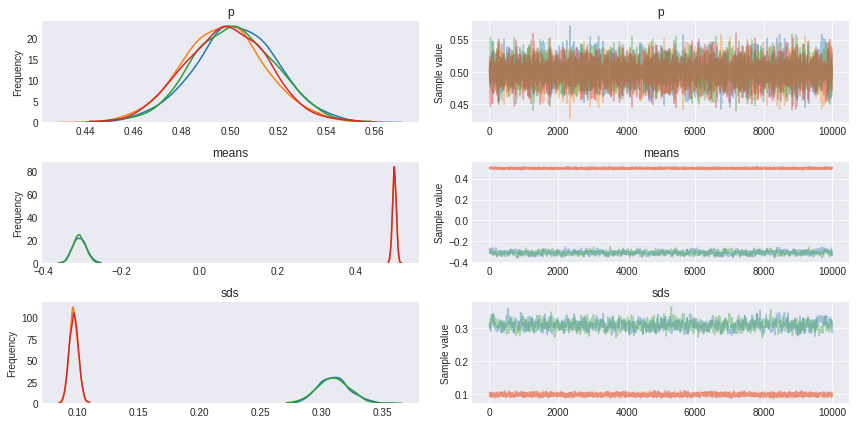

In [0]:
pm.traceplot(tr, varnames = ['p','means','sds'])

In [0]:
# summary
pm.summary(tr, varnames = ['p','means','sds']).round(2)

/usr/local/lib/python3.6/dist-packages/pymc3/stats.py:974: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  axis=1, join_axes=[dforg.index])


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
p__0,0.50,0.02,0.0,0.47,0.54,1845.11,1.0
p__1,0.50,0.02,0.0,0.46,0.53,1845.11,1.0
means__0,-0.31,0.02,0.0,-0.34,-0.27,596.85,1.0
means__1,0.50,0.00,0.0,0.49,0.51,2083.07,1.0
sds__0,0.31,0.01,0.0,0.29,0.34,573.71,1.0
sds__1,0.10,0.00,0.0,0.09,0.10,1707.22,1.0


## Hierarchical models

Hierarchical models put priors on the hyperparamaters.

$$ y \sim f(y \mid \theta) $$

$$ \theta \sim h(\theta \mid \sigma) $$

More levels of hiearchy are possible.

In this way a hierarchical model allows information to be shared between parameters $\theta,$ since they might be not independent, but rather drawn fgrom a common distribution.

# OUTRO

## Bayesian Decision Theory

- $\theta$ - parameter

- $p(\theta)$ - prior on $\theta$

- $A$ - all possible actions one can take

- $l: A x \Theta \to R$ - loss function

The posterior risk of an action $a \in A$ is 
$$r(a) = E_\theta [ l(a, \theta) \mid D] =  $$

i.e. the expectation of the loss

$$ = \int l(a, \theta) p(\theta \mid D) d \theta  $$

### Loss functions:

1. $l (\theta, \hat{\theta}) = (\theta - \hat{\theta})^2$. To compute the action, we need to minimize $$r(\hat{\theta}) = E [(\theta - \hat{\theta})^2 \mid D].$$ To derive the answer, take derivative of the integral with respect to $\hat{\theta}.$ And so $\hat{\theta} = E [\theta \mid D]$


2. $l (\theta, \hat{\theta}) = \mid \theta - \hat{\theta} \mid$ -> median of the posterior

3. $l (\theta, \hat{\theta}) = I_{\theta \ne \hat{\theta}}$ -> mode

## Say again, frequentist or Bayesian?

### Frequentist

- There are many ways to come up with a point estimator: themethod of moments, etc. Our responsibility is to justify the choice of the estimator.

### Bayesian

- There is no choice of the procedure of obtaining the estimate. Our choices are  the prior, probability model, and (maybe) the loss function. Everything after that is computation!

## How to chose a PPL?

- functionality (e.g. availability of discrete parameters)
- open to custom distributions (and samplers)
- preformance
- well documented
- abundant library of examples 
- active (and supportive) community


## An application from Pharma

go with explanation over the Python code of the publication

https://pubs.acs.org/doi/pdf/10.1021/acs.chemrestox.9b00264

## Take home messages

### 1. Advantages of Bayesian inference

- allows to use domain knowledge about the research question
- incorporate various sources of knowledge
- can answer a broad variety of question by computing desired qunatities from posterior samples
- can work with small data


### 2. Disadvantages of Bayesian inference

- computationally involved
- even running a model in a PPL can take a lot of time
- for MCMC moethods convergence is achieved, in theory, only at infinite number of iterations

### 3. PPLs

- modern approach to inference
- provide the iference "button"
- only the model needs to be formulated
- each PPL has its own syntaxis

For this and more material, including BNNs (in Julia), come to AMLD2020.


## Literuature

1. "Statistical ReThinking", Richard McEarlth: https://xcelab.net/rm/statistical-rethinking/
2. PyStan: https://pystan.readthedocs.io/en/latest/index.html
3. Stan examples and reference manual: https://github.com/stan-dev/example-models/wiki
3. PyMC3: https://docs.pymc.io/
4. Diagnosing biased inference with divergences (M. Betancourt): https://mc-stan.org/users/documentation/case-studies/divergences_and_bias.html
5. M. Betancourt, "A Conceptual Introduction to Hamiltonian Monte Carlo"
6. Model checking and diagnostics: https://pymc-devs.github.io/pymc/modelchecking.html
7. Convergence diagnostics: https://rlhick.people.wm.edu/stories/bayesian_5.html
8. Comparison of R/Stan, Python/PyMC3, Julia/Turing on the example of the Ordered Logostic Regression: https://medium.com/@liza_p_semenova/ordered-logistic-regression-and-probabilistic-programming-502d8235ad3f
9. Bayesian Methods for Hackers: https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers
10. Bayesian modelling with spatial data using PyMC3: https://github.com/ShreyaKhurana/GeoPy2019/blob/master/Bayesian%20modeling%20with%20spatial%20data%20using%20PyMC3.pdf
11. "Predicting Drug-Induced Liver Injury with Bayesian Machine Learning", Williams, Lazic, Foster, Semenova, Morgan: https://pubs.acs.org/doi/pdf/10.1021/acs.chemrestox.9b00264